## Train a Multiple Linear Regression Model
The model will be trained using pandas and scikit-learn.
The model will be trained from data found at https://www.kaggle.com/datasets/jeremylarcher/american-house-prices-and-demographics-of-top-cities

I am running this through VS Code, using a docker container. You may also use the `ipynb` file in other Jupyter Notebook style setups. Consult Jupyter Notebook for options.

**To download the data, run this cell.**

Running this cell will download the data, if you are running it in the docker container. If not, you will need to navigate to the `KAGGLE_DATA_URL` and download the data manually.

In [2]:
import os
from data import download_kaggle_dataset
KAGGLE_DATA_URL = "https://www.kaggle.com/datasets/jeremylarcher/american-house-prices-and-demographics-of-top-cities"
DATA_PATH = os.path.join(os.getcwd(), "data", "linear_regression_data")
download_kaggle_dataset(KAGGLE_DATA_URL, DATA_PATH)

/workspaces/MS365/src/data/linear_regression_data contains data. Delete the file(s) if you want to download again.


**Import the necessary python packages**

Import `pandas`, `sklearn.model_selection.train_test_split`, `sklearn.linear_model.LinearRegression`, `sklearn.metrics.mean_absolute_error`, `sklearn.metrics.mean_squared_error`, and `matplotlib.pyplot`. Typically, packages such as `pandas` and `matplotlib.pyplot` are imported with an allias. I will not be following that strategy here. 
The default size of the plots from `matplotlib.pyplot` is 6.4 inches by 4.8 inches ([width by height](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)). I wll be setting them to 20 inches by 5 inches. This will create a more readable output. Depending on your screen size, you may want to change this for your own use.

If you are running the docker container or if you are using [Google Colab](https://colab.research.google.com/), the `pip install` has already been done. If not, then please consult your jupyter notebook environment docs for how to install the needed packages.

In [ ]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
import matplotlib.pyplot
matplotlib.pyplot.rcParams['figure.figsize'] = [20, 5]

**Get to know your data**

Load in the data file. If you used the above method for downloading the file from Kaggle, it will be in the `/data/linear_regression_data` folder. The name of the file is `American_Housing_Data_20231209.csv`. Use `pandas.read_csv` to load the file into the `df` variable. If you were to look at the first 15 lines, you would see that there are duplicate rows in the file. Running `drop_duplicates` whithout specifying any columns will check every column for duplicates, before dropping the row.

To train a linear regression model, the data cannot be categorical. If it were, it would be necessary to convert the categorical data into numerical data. There are a variety of methods for doing so, but those methods will not be explained here. Instead, the categorical data will be dropped from the data set. At first glance, the columns `Address`, `City`, `State`, and `County` can be dropped since they do not contain purely numerical data. `Zip Code`, `Latitued`, and `Longitude` will also need to be dropped. Even though the data are numerical, what they represent is not numerical. If the zip code were to be used, the statistical model would expect the numbers to act like numbers, thus the assumption would be that `Zip Code` 10013 is smaller than Zip Code `84321`. This is not necessarily the case. The same assumption would have to be made for `Latitude` and `Longitude`.

*HINT: Make sure you indicate that you want the `drop_duplicates` and the `drop` function to work `inplace=True`*

Using the `head()` function will allow you to see the top rows of your dataset. Here, I have used 15. The default is 5. You can change the number to whatever your need is.

In [7]:
df = pandas.read_csv(os.path.join(DATA_PATH, "American_Housing_Data_20231209.csv"))
df.drop_duplicates(inplace=True)
df.drop(columns=["Address", "City", "State", "County", "Zip Code", "Latitude", "Longitude"], inplace=True)
df.head(n=15)

,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income
0,3999000.0,2,3,1967,29563,20967.9,370046.0
2,1650000.0,1,1,718,29815,23740.9,249880.0
3,760000.0,3,2,1538,29815,23740.9,249880.0
4,1100000.0,1,1,600,29815,23740.9,249880.0
5,764900.0,1,1,643,15514,20107.7,188289.0
6,2499000.0,2,2,1471,42484,46004.0,261254.0
7,4580000.0,2,3,1800,33303,28998.9,281977.0
8,540000.0,2,1,750,39401,39689.7,117438.0
9,570000.0,1,1,589,39401,39689.7,117438.0
10,699999.0,3,1,1200,39401,39689.7,117438.0


Use the `describe()` function to better understand your data. The function will give you statistical information of non-null values. For example, it will return the count, the mean, the standard deviation, and other such statistical information that can be useful for better understanding the data with which you are working.

In [6]:
df.describe()

,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income
count,3.901900e+04,39019.000000,39019.000000,39019.000000,39019.000000,39019.000000,39017.000000
mean,6.217622e+05,3.171378,2.463748,1899.984187,37697.457905,2367.620880,110786.631622
std,9.531520e+05,1.309513,1.325817,1210.783157,18635.871043,2931.105982,47291.030788
min,1.800000e+03,1.000000,1.000000,2.000000,0.000000,0.000000,27475.000000
25%,2.649000e+05,3.000000,2.000000,1201.500000,24440.000000,897.100000,76640.000000
50%,3.999000e+05,3.000000,2.000000,1638.000000,35083.000000,1578.800000,100405.000000
75%,6.690000e+05,4.000000,3.000000,2265.000000,46816.000000,2727.000000,134948.000000
max,3.800000e+07,54.000000,66.000000,74340.000000,116469.000000,58289.600000,900203.000000


The column `Median Household Income` contains 39,017 non-null values. The other columns contain 39,019 non-null values. This means that `Median Household Income` contains 2 null values. The missing values will cause problems with the statistical analysis, so the values either need to be dropped or they need to be imputed. Since there are only two null values, it is possible to run the pandas [`dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) function and the missing values would be removed from the dataset. The second option is imputation or [replacing the missing value with estimates](https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/). The imputation method will be used here because I don't want to lose out on any of the data. If you have a really small dataset, then imputation will likely be your best strategy. If you have a very large dataset (think millions or billions of rows of data), then imputation may not be necessary, since there are so many rows of data.

To impute the data, use the pandas [`fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) function to replace all missing values with the strategy of your choice. There are many kinds of imputation. Filling in the missing values with the mean/median/mode tends to be the simplest. It is not necessarily the best, but will work for now. The first parameter of the `fillna()` function is the value you want to use to replace the missing data. You can either type in the specific value you want, or you can use the `mean()` function on the `Median Household Income` column and have it calculate the mean before it changes all the missing values. I like using the mean-value because this means that the new values will not alter the current average for that column. However, this could be the wrong strategy if the data are not normally distributed or there are other such statistical anomalies.

*Hint: Using the `inplace=True` parameter may cause a warning about setting a value on a copy. To avoid that error, assign the values back to the `df["Median Household Income"]` column.*

In [7]:
df["Median Household Income"] = df["Median Household Income"].fillna(value=df["Median Household Income"].mean())
df.describe()

,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income
count,3.901900e+04,39019.000000,39019.000000,39019.000000,39019.000000,39019.000000,39019.000000
mean,6.217622e+05,3.171378,2.463748,1899.984187,37697.457905,2367.620880,110786.631622
std,9.531520e+05,1.309513,1.325817,1210.783157,18635.871043,2931.105982,47289.818741
min,1.800000e+03,1.000000,1.000000,2.000000,0.000000,0.000000,27475.000000
25%,2.649000e+05,3.000000,2.000000,1201.500000,24440.000000,897.100000,76640.000000
50%,3.999000e+05,3.000000,2.000000,1638.000000,35083.000000,1578.800000,100405.000000
75%,6.690000e+05,4.000000,3.000000,2265.000000,46816.000000,2727.000000,134948.000000
max,3.800000e+07,54.000000,66.000000,74340.000000,116469.000000,58289.600000,900203.000000


**Split the dependent values from the independent values**

Linear Regression computes the linear relationship between the dependent variable and the independent variable. Multiple Linear Regression does the same thing, with more than one independent variable. The equation for Linear Regression is: $y = mx + b$. The equation for Multiple Linear Regression is: $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + \varepsilon$.

The purpose of the Multiple Linear Regression model will be to try to predict the price of the house, based on the other columns in the dataset. To do so, the `Price` column will need to be removed from the rest of the data. Create a variable called `y_column` with the value string-literal value of `Price`. This will be used to create a new dataset with only the `Price` column values. Create a variable called `x_columns`. The `x_columns` variable needs to be a `list()` of all the other columns. I have chosen to do this by pulling all the column values using the `columns` attribute and then removing the `y_column` value from that list. The variable `x_columns` will contain all the other columns.

With the newly created `y_column` and `x_columns` variables, we can now filter the original dataframe (`df`), and create two new variables. One will be a dataframe with all the `x_columns` columns and there respective data, the other will be a pandas series with all the `y_column` values. You can print `x_data` and `y_data` to see what is in the new variables. I have chosen to not do that here.

In [8]:
y_column = "Price"
x_columns = list(df.columns)
x_columns.remove(y_column)

x_data = df[x_columns]
y_data = df[y_column]

**Split the data**

The data will need to be split into training datasets and testing datasets. The function `train_test_split` imported from `sklearn.model_selection` can be used to split the data. The function will take the `x_data` and `y_data` and split it into similarly sized datasets. You should consult the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to get a better understanding of the different parameters that can be passed in.

Create variables `x_train`, `x_test`, `y_train`, and `y_test`. The function `train_test_split` will ouput the data to these 4 variables because we used the `x_data` first and the `y_data` second in the parameters of the function.

Some key things to keep in mind:
1. `train_test_split` will split the data randomly. You should set a seed value for the `random_state` parameter so the random separation is consistent. I have chosen `14`.
2. The order you use for your `y_data` and your `x_data` will effect the output data. If you do `train_test_split(y_data, x_data)`, then your output will be y_data before x_data. If you do `train_test_split(x_data, y_data)`, the x_data will be before the y_data.
3. A fairly standard choice for the size of your test data is 20% of the total data. If you have more data, you may be able to do a smaller percentage.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=14)

**Create a linear regression model**

Use `LinearRegression` from `sklearn.linear_model` to create a linear regression model that can be trained on the split data that was created above. The `LinearRegression()` class value needs to be assigned to a variable so the other functions and methods from the class can be used. I have called the linear regression model `lr`. Train the linear regression model using the `x_train` and `y_train` data. The model will be trained using the `fit()` function from the `LinearRegression()` class.

In [10]:

lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

**Statistical Model assumptions: Linear Regression**

There are a few assumptions made about the data when using a Linear Regression model.
1. A **linear relationship** exists between the dependent variable and the independent variable.
2. The residuals are normally distributed, **Multivariate Normality**.
3. The independent variables are not highly correlated, **No Multicollinearity**.
4. The variance of the error terms are similar acros the values of the independent variables, **Homoscedasticity**.

A simple way to determine if there is a linear relationship between the dependent and independent variables, is to graph them. Using the `plot()` function, create a scatter plot for each column. In the scatter plot, the `x` parameter will be the independent variable and the `y` parameter will be the dependent variable.

For this activity, the basic plot will be adequate. If you are going to use the plots in any kind of presentation, you should add additional labeling and a legend to make them more legible.

Use a for-loop to loop through all the values in `df.columns`. The if-statement allows for the checking of the `Price` column so it can be skipped, using `continue`.

*Hint: Do not plot `Price` vs. `Price`.*

The scatter plots seem to suggest there could be a linear relationship between the independent and dependent variables. The visual representation of linearity does not look very strong. Based on this alone, it could be argued that the linear relationship of the data does not exist and therefore the Linear Regression model is not the best option for this analaysis. 

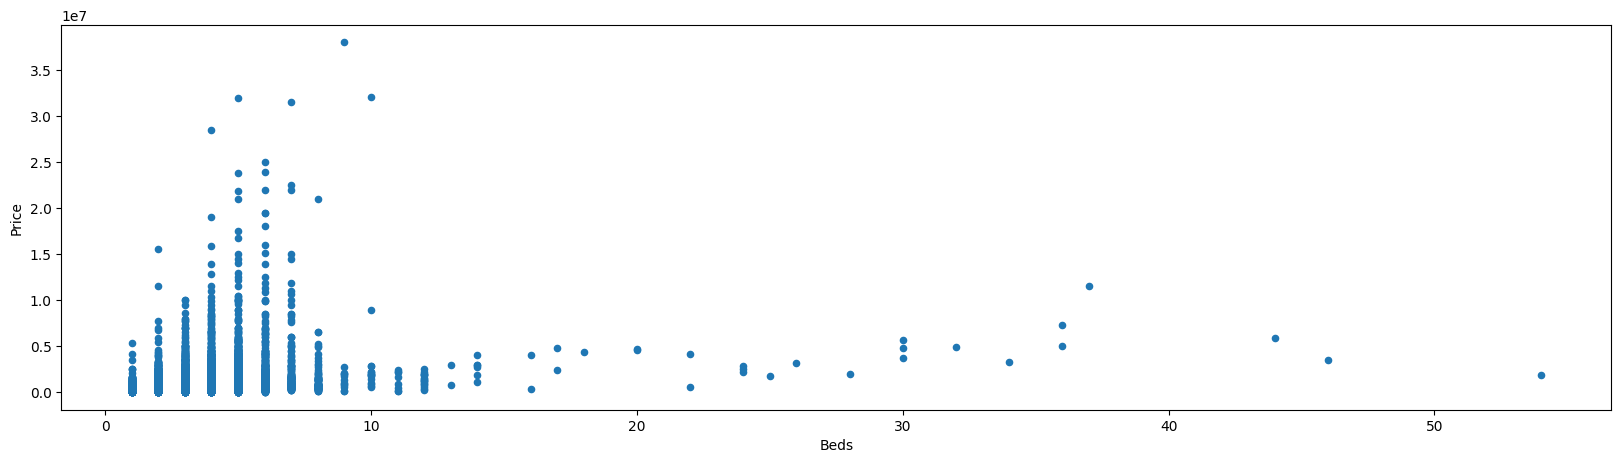

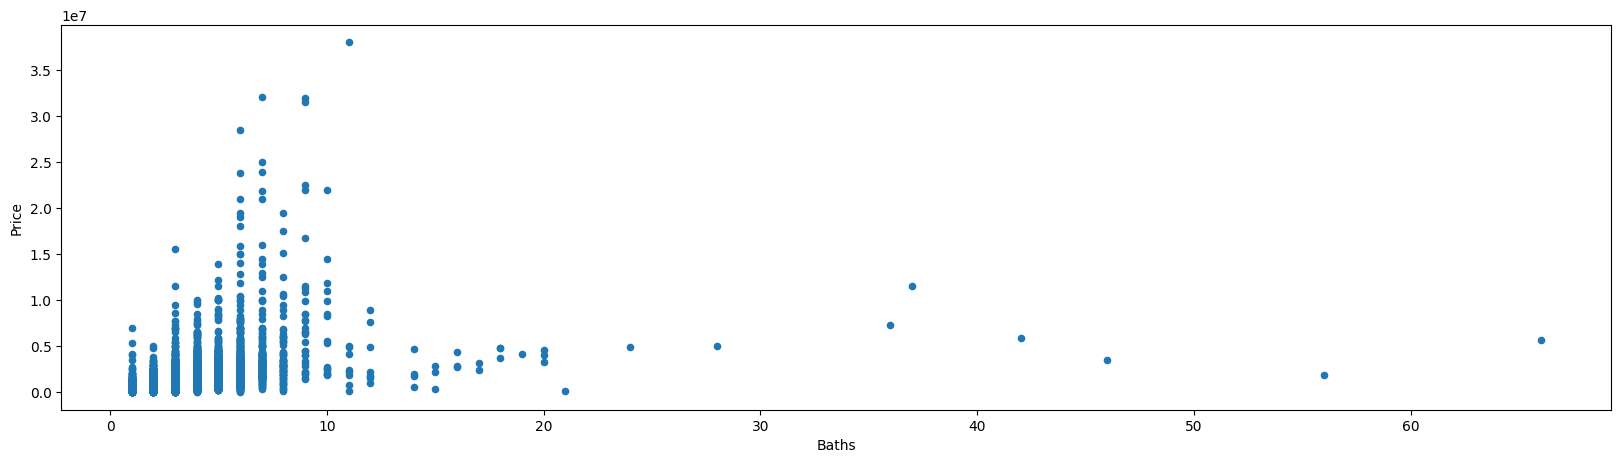

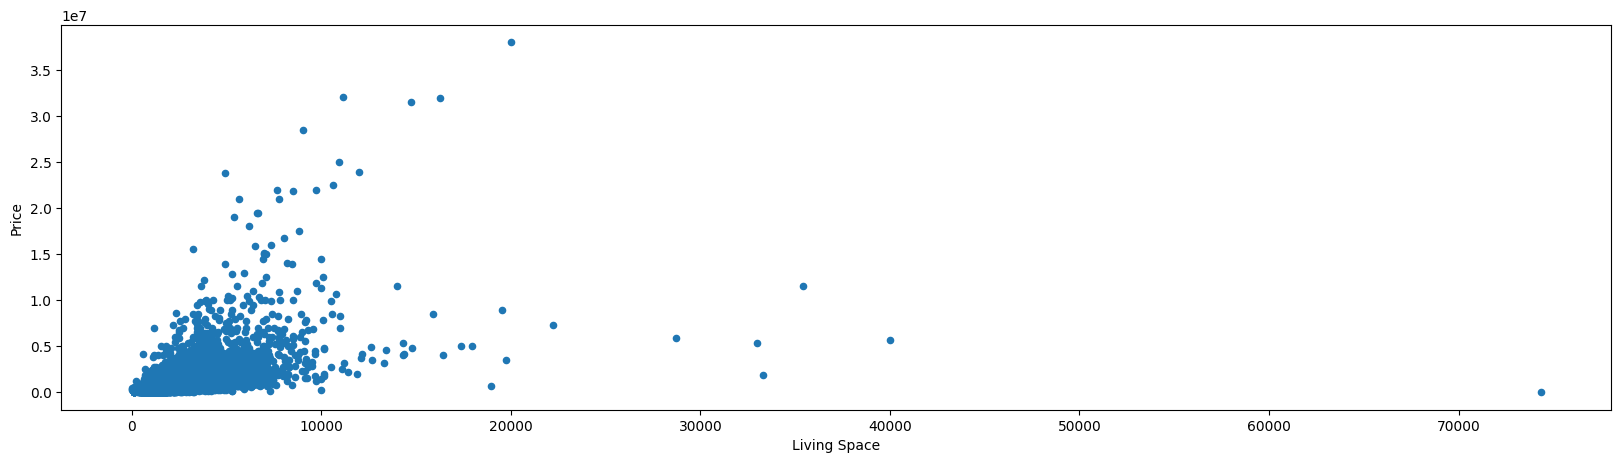

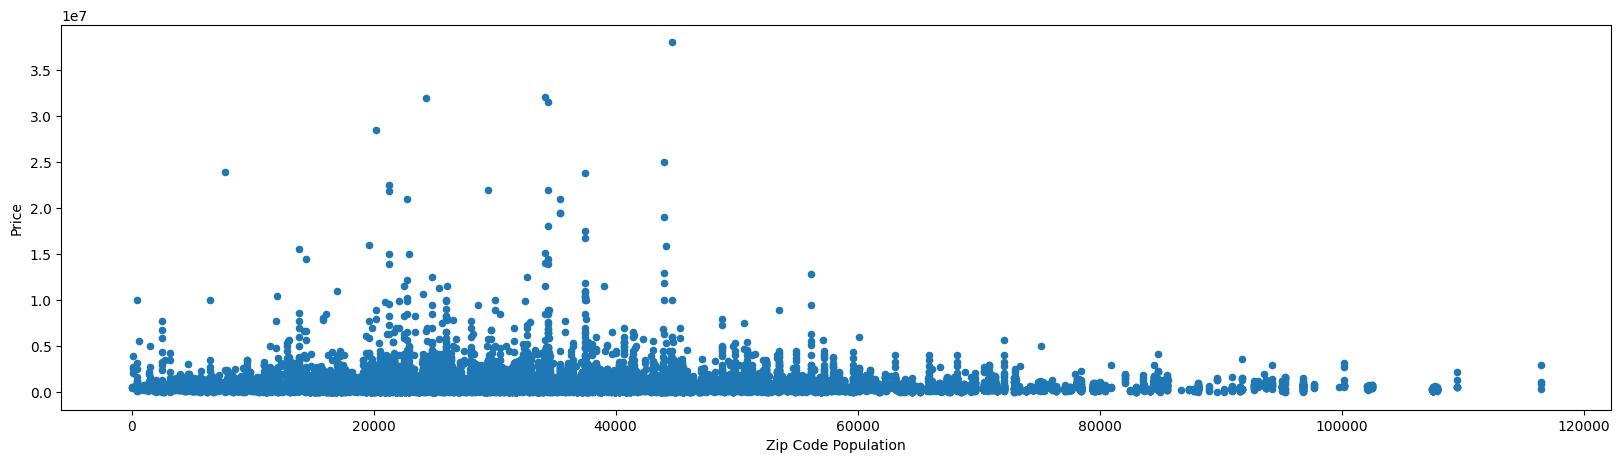

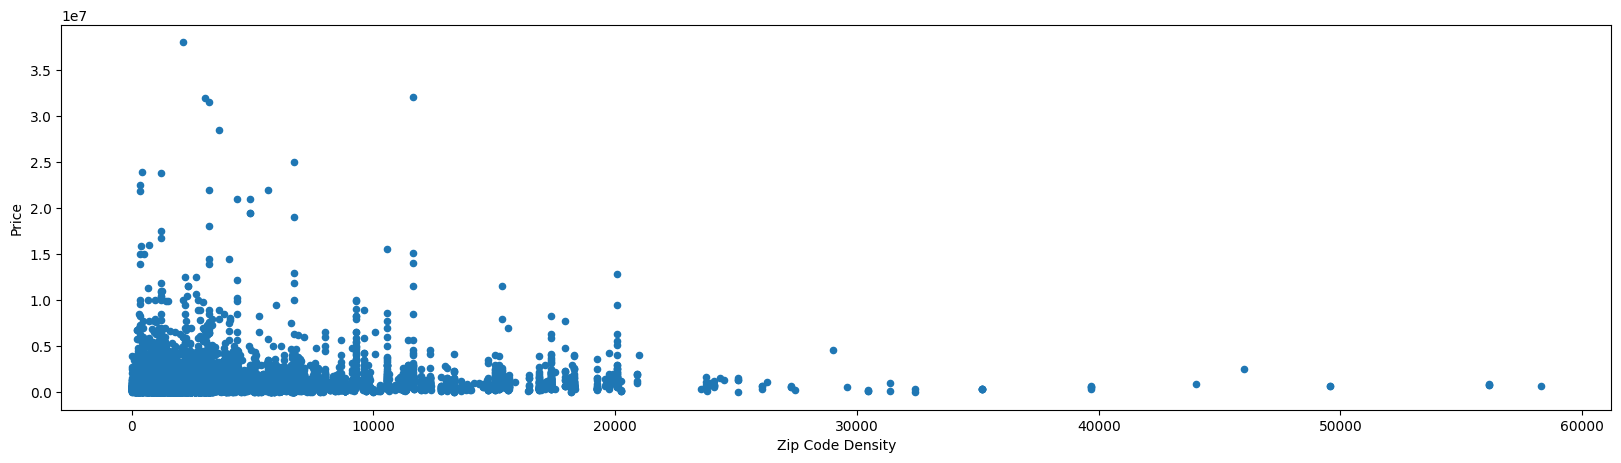

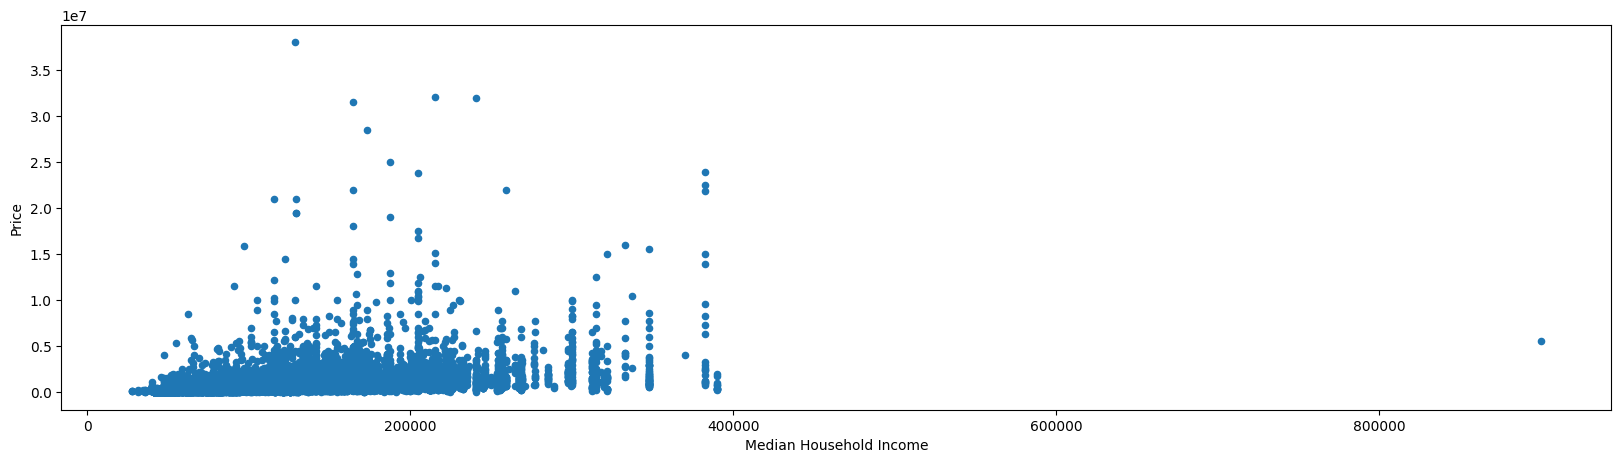

In [11]:
for column in df.columns:
    if column == "Price":
        continue
    df.plot.scatter(x=column, y="Price")
matplotlib.pyplot.show()

To test for multicolinearity, use the `corr()` function on the `x_data` variable. This is the data before the use of `test_train_split()`. The `corr()` function will show you the collinearity of the data. The values will be between -1 and 1. In statistics, a correlation is considered strong when it is greater than 0.7 (between 0.7 and 1.0) or less than -0.7 (between -0.7 and -1.0).

The table shows that there is a strong positive correlation between `Beds`, `Baths`, and `Living Space`. Given the strong positive correlation, two of the three columns could be dropped, to improve the output of the Linear Regression model. The data is homes for sale, given this knowledge, it would not be unlikely to assume that a larger home will have more bedrooms and more bathrooms, so the `Beds` and `Baths` columns could be dropped.

I will not be removing any columns at this time. However, leaving the columns in the analysis does violate the **No Multicollinearity** assumption of the Linear Regression model.

In [12]:
x_data.corr()

,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income
Beds,1.000000,0.703461,0.653033,0.068917,-0.133101,0.014032
Baths,0.703461,1.000000,0.767713,0.002532,-0.067943,0.225902
Living Space,0.653033,0.767713,1.000000,-0.043060,-0.104544,0.222231
Zip Code Population,0.068917,0.002532,-0.043060,1.000000,0.107848,-0.122900
Zip Code Density,-0.133101,-0.067943,-0.104544,0.107848,1.000000,0.178598
Median Household Income,0.014032,0.225902,0.222231,-0.122900,0.178598,1.000000


Checking for [homoscedasticity or heteroscedasticity](https://en.wikipedia.org/wiki/Homoscedasticity_and_heteroscedasticity) can be done by ploting the residuals vs. the estimated values of y. Create the estimated values of y with the `predict()` method from the Linear Regression model. The output of `lr.predict()` will be the estimated or predicted values of y, based on the input values of x. Use the `x_test` variable that was created earlier.

Once you have the estimated values of y (`y_estimates`), calculate the residuals by substracting the actual values (`y_test`) from the predicted or estimated values (`y_estimates`). This will result in the [residual value](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Mostly_Harmless_Statistics_(Webb)/12%3A_Correlation_and_Regression/12.02%3A_Simple_Linear_Regression/12.2.02%3A_Residuals).

In [13]:
y_estimates = lr.predict(x_test)
residuals = y_test - y_estimates

With the residual values calculated, a scatter plot can be created to view the distribution of the residual values versus the estimated values. If the expectation is homoscedasticity, there should be no discernible pattern visible in the plot. However, if the model is heteroscedatic, then there will be a visible funnel shape. 

Plot the `residuals` as the x-value and the `y_estimates` as the y-value. To make the plot easier to read, add labels for the x-axis and y-axis, a title, and grid lines. The resulting plot should show a funnel shape which grows wider as the predicted values get larger. This shows that the model is not homoscedatic, violating the assumption of **Homoscedasticity**.

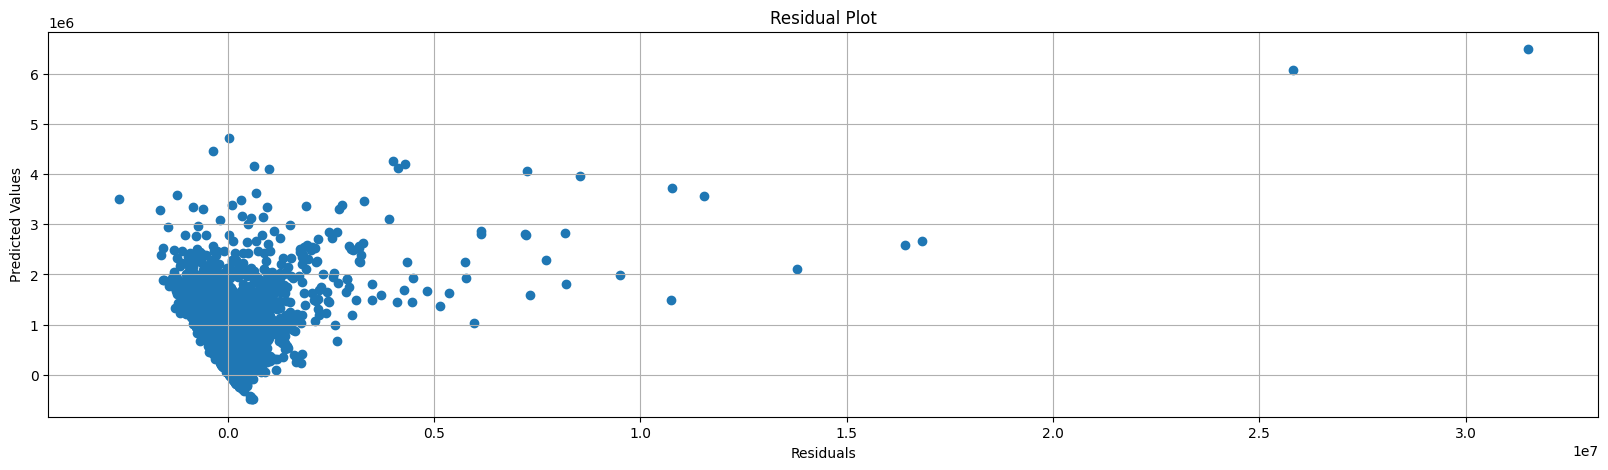

In [14]:
matplotlib.pyplot.scatter(residuals, y_estimates)
matplotlib.pyplot.xlabel("Residuals")
matplotlib.pyplot.ylabel("Predicted Values")
matplotlib.pyplot.title("Residual Plot")
matplotlib.pyplot.grid(True)
matplotlib.pyplot.show()

The final assumption of the Linear Regression model is the normal distribution of the residuals. This can be verified with a histogram. Using `matplotlib.pyplot.hist`, graph the residuals as the `x` parameter, choosing the number of bins you would like displayed. For this analysis, I have chosen 200 bins. 

The results of the histogram show that there seems to be positive skewness to the distribution, with what seems to be a longer right tail. Also, the distribution curve shows a leptokurtic distribution. Both of these suggest that the residuals do not have a normal distribution. Another example that the data chosen for analysis is likely not a good candidate for a Linear Regression analysis. The Multivariate Normality assumption is also violated.

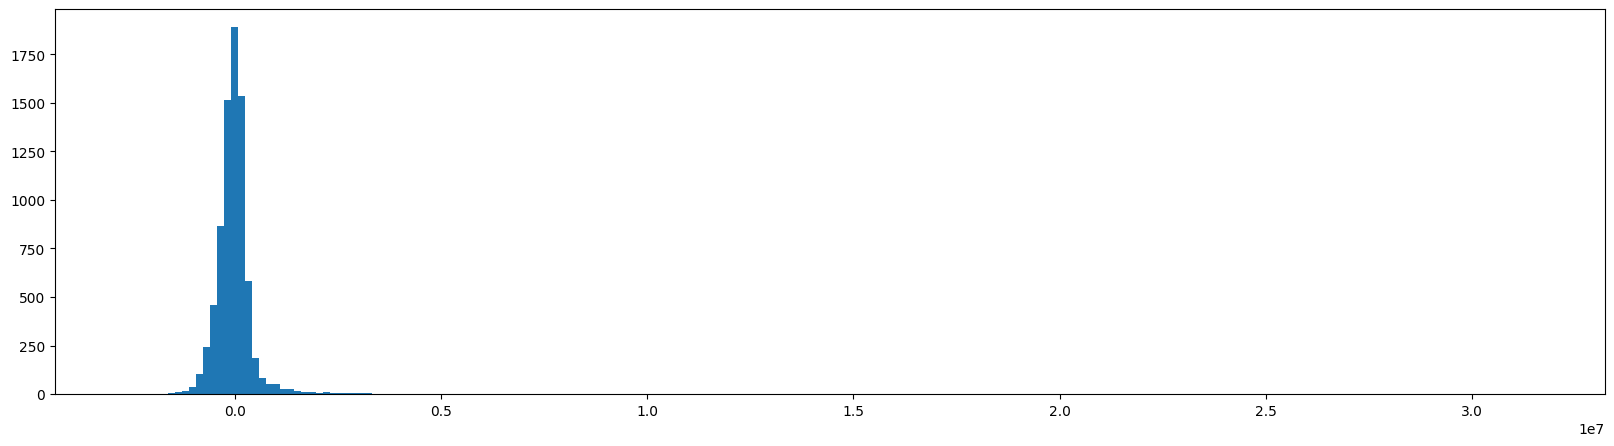

In [15]:
matplotlib.pyplot.hist(residuals, bins=200)
matplotlib.pyplot.show()

**Validating the Accuracy of the Model**

When validating the Linear Regression model, it is common to look at the difference between the predicted value and the actual value. The difference will be the error. If there is no difference between the actual value and the predicted value, then the error would be 0. This is unlikely, but is ideal.

We will look at four different tests for determining the accuracy of the Linear Regression model. The first is the Mean Absolute Error. This test calculates the absolute average error of all data points. The closer the value is to 0, the better the model. `sklearn.metrics` provides the function [`mean_absolute_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html). Use `y_test` and `y_estimates` to determine the Mean Absolute Error. The benefit of this test is that [it does not put much weight on outliers](https://arize.com/blog-course/mean-absolute-error-in-machine-learning-what-you-need-to-know/). 

There does not seem to be a great concensus on what a "good" value is for the Mean Absolute Error. If the value is really close to 0, then that is good. However, how would you know if the returned value is bad? In our example, the returned value is approximately $309,160.00. This might be bad, since we are talking about house prices. But, we would need to know where that number fits within the highs and lows of our data to better assess this value.

The accuracy test [`mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) is similar to `mean_absolute_error`, but the residual values are squared prior to calculating the average. The desired outcome is still a number that is as close to zero as possible. Also, exactly what is considered a good Mean Squared Error value will depend on the data. Squaring the residuals helps to eliminate negative values and it [penalizes](https://statisticsbyjim.com/regression/mean-squared-error-mse/) large errors, because it increases the impact of large errors.

Another accuracy test is the [`root_mean_squared_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.root_mean_squared_error.html) test. The average of the residuals are calculated in a similar fashion to `mean_squared_error`, but the resultant average is square-rooted, [resulting in the standard deviation of the residuals](https://statisticsbyjim.com/regression/root-mean-square-error-rmse/). The Root Mean Square Error is a non-standardized goodness-of-fit value that allows for predictions about the residuals. Since it is a standard deviation, assumptions about what data falls within 1, 2, or 3 standard deviations are easy to calculate. A value of zero would still be ideal, and knowing the data will still be essential to understand whether or not the value is good.

The final accuracy test to be discussed is the [R-Squared goodness-of-fit measure](https://statisticsbyjim.com/regression/interpret-r-squared-regression/). The R-Squared metric indicates how much of the variation in our dependent variable can be explained by the independent variables. Typically, the desired outcome from the R-Squared measure is something as close to 1.0 as possible, with values close to 0.0 being bad. However, this is not a strict rule and there are instances where a lower R-Squared value will still result in a Mutiple Linear Regression model that is good at predicting new values.

The R-Squared measure can be calculated using the [`score()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) method from the Linear Regression model that was created (`lr`). Use `x_test` and `y_test` as your variables for the `X` and `y` parameters. The output will be the R-Squared value, which has been assigned to `r_squared`.

In [ ]:
me = mean_absolute_error(y_test, y_estimates)

mse = mean_squared_error(y_test, y_estimates)

rmse = root_mean_squared_error(y_test, y_estimates)

r_squared = lr.score(x_test, y_test)

print(f'Mean Absolute Error = {me}')
print(f'Mean Squared Error = {mse}')
print(f'Root Mean Squared Error = {rmse}')
print(f'R-Squared = {r_squared}')

Mean Absolute Error = 309160.82988544233
Mean Squared Error = 656763731939.2495
Root Mean Squared Error = 810409.6075067531
R-Squared = 0.3991120845386128


The measures of accuracy, including the R-Squared measure, suggest that the Linear Regression model was not as good as it could have been. The R-Squared value suggests that only about 40% of the variation in the data could be explained by the independent variables. However, there have been many instances where the analysis of the data has shown that there are issues with the data.

It is likely the case that the data need to be cleaned more so the analysis can be more accurate. Looking at the output from our analysis shows that there could be some outlier values that are causing problems with the analysis. Removing the outliers could result in a better analysis and an R-Squared score that is larger than .39991.